<a href="https://colab.research.google.com/github/JAVegaG/MCT_AI/blob/main/Project_3/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Linear Regression is a supervised machine learning algorithm, which means that its training is based on a series of inputs to which its outputs are known beforehand.

Regression analysis focuses on modeling the relationship between a dependent variable and one or more independent variables. Therefore, as a result of this modeling, one could predict an expected result given some input. 

Now, when talking about linear regression it is important to understand that it refers to modeling a relationship between one dependent variable and only one independent variable.

## Math

First, it is necessary to **normalize** the data in order to make learning easier for the model. This means, transforming the original data to guarantee a better performance of the learning algorithm. In this case, the process carried on is called **standardization** and consists of using the mean and standard deviation to transform the original data into equivalent data of zero-mean and standard deviation of one. Mathematically:

\begin{equation}
x' = \frac{x-\overline{x}}{\sigma}
\end{equation}

Then, since this type of regression is linear, the expected output must follow this form:

\begin{equation}
y = \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \dots \theta_n x_n 
\end{equation}

The previous expression can be rewritten as a dot product  between two vectors:

\begin{equation}
\hat{y} = \vec{\theta} \cdot \vec{X}
\end{equation}

Next, to evaluate the performance of the algorithm it is used a **loss function**, which compares the predicted output of the model to the real output. For regression applications, it is very common to use **mean squared error (MSE)** that iterates on every component of the real output vector and the predicted output vector while subtracting from one another and finally dividing the result by the number of components iterated. Mathematically:

\begin{equation}
L_{MSE} = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_{i})^2
\end{equation} 

Later, an **optimization algorithm** is used to adjust the parameters of the model, which would improve the results in the regression. In this example, the **gradient descent** is the algorithm used as shown below, where θ is the parameter to optimize, η is the learning rate, ∇ is the gradient itself, y is the actual value, and L is the loss function:

\begin{equation}
\theta_{t+1} = \theta_{t} - \eta\nabla{L_{MSE}(\hat{y},y)}
\end{equation}

Finally, the partial derivatives of the loss function with respect to the parameters:

\begin{equation}
\frac{\partial L_{MSE}(\hat{y},y)}{\partial \vec{\theta}}
= -
\frac{2}{n} \sum_{i=1}^{n}\vec{X}_i^T \cdot (y_i - \hat{y}_{i})
\end{equation}

## Code

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
!git clone https://github.com/JAVegaG/MCT_AI.git

Cloning into 'MCT_AI'...
remote: Enumerating objects: 338, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 338 (delta 92), reused 89 (delta 51), pack-reused 201
Receiving objects: 100% (338/338), 3.54 MiB | 9.76 MiB/s, done.
Resolving deltas: 100% (164/164), done.


In [3]:
from MCT_AI.Project_3 import my_functions as mf

First, it is necessary to identify the datasets that would be a good fit for implementing a linear regression algorithm. Therefore, to find an adequate dataset one must search for those with a **Linear Regression task** and **few features**.

Kaggle was used for searching the dataset, and afterward, it was selected a simple one, which means it only has an independent variable. This dataset aims to predict what the salary of a person would be given their years of experience.

In [4]:
df = pd.read_csv("MCT_AI/Project_3/Salary.csv", index_col=False)
df = df.drop(df.select_dtypes(['category','object']),axis=1).copy()

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


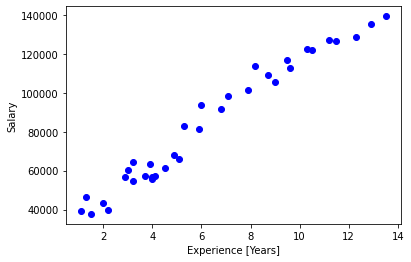

In [6]:
total_data = np.array(df, dtype=float)

target_column = total_data.shape[1] - 1

x, y = total_data[:, :target_column], total_data[:, target_column]

plt.xlabel('Experience [Years]')
plt.ylabel('Salary')
plt.plot(x[:,target_column-1], y, 'bo')
plt.show()

x_norm, y_norm, mu, std = mf.normalize(total_data)

In [7]:
y_norm = np.reshape(y_norm, (len(y_norm),1))
x_norm = np.hstack((np.ones((x_norm.shape[0],1)), x_norm))

## Results

In [8]:
theta = np.zeros((x_norm.shape[1], 1))
learning_rate = 0.1
num_epochs = 50

### Model 1 using Gradient Descent

In [9]:
theta1, J_all1 = mf.gradient_descent(x_norm, y_norm, theta, learning_rate, num_epochs)

In [10]:
J1 = mf.cost_function(x_norm, y_norm, theta1)
print("Cost:\n", J1)
print("Parameters:\n", theta1)

Cost:
 [[35006769.82674039]]
Parameters:
 [[83944.40188836]
 [31142.37825758]]


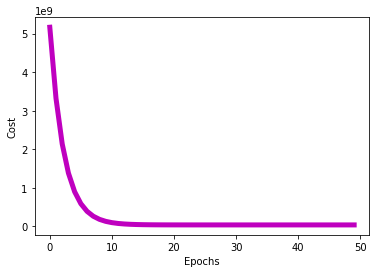

In [11]:
n_epochs1 = []
jplot1 = []
count1 = 0

for i in J_all1:
	jplot1.append(i[0][0])
	n_epochs1.append(count1)
	count1 += 1

jplot1 = np.array(jplot1)
n_epochs1 = np.array(n_epochs1)

mf.plot_cost(jplot1, n_epochs1)

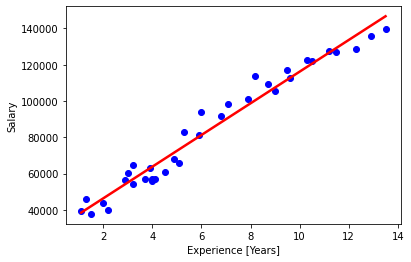

In [12]:
y_pred1 = mf.test(theta1, x, mu, std)

plt.xlabel('Experience [Years]')
plt.ylabel('Salary')
plt.plot(x[:,0], y, 'bo')
plt.plot(x[:,0], y_pred1, 'r', linewidth=2.5)

plt.show()

### Model 2 using Stochastic Gradient Descent with Momentum = 0.1

In [13]:
theta2, J_all2 = mf.SGDM(x_norm, y_norm, theta, learning_rate, num_epochs,
                         momentum=0.1)

In [14]:
J2 = mf.cost_function(x_norm, y_norm, theta2)
print("Cost:\n", J2)
print("Parameters:\n", theta2)

Cost:
 [[35006790.84352771]]
Parameters:
 [[83941.13798018]
 [31141.16738632]]


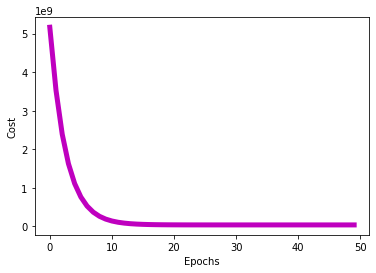

In [15]:
n_epochs2 = []
jplot2 = []
count2 = 0

for i in J_all2:
	jplot2.append(i[0][0])
	n_epochs2.append(count2)
	count2 += 1

jplot2 = np.array(jplot2)
n_epochs2 = np.array(n_epochs2)

mf.plot_cost(jplot2, n_epochs2)

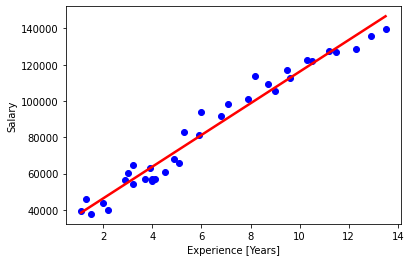

In [16]:
y_pred2 = mf.test(theta2, x, mu, std)

plt.xlabel('Experience [Years]')
plt.ylabel('Salary')
plt.plot(x[:,0], y, 'bo')
plt.plot(x[:,0], y_pred2, 'r', linewidth=2.5)

plt.show()

### Model 3 using Stochastic Gradient Descent with Momentum = 0.9

In [17]:
theta3, J_all3 = mf.SGDM(x_norm, y_norm, theta, learning_rate, num_epochs,
                         momentum=0.9)

In [18]:
J3 = mf.cost_function(x_norm, y_norm, theta3)
print("Cost:\n", J3)
print("Parameters:\n", theta3)

Cost:
 [[61525115.41127251]]
Parameters:
 [[79117.54412964]
 [29351.67123321]]


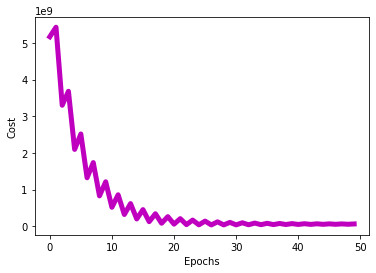

In [19]:
n_epochs3 = []
jplot3 = []
count3 = 0

for i in J_all3:
	jplot3.append(i[0][0])
	n_epochs3.append(count3)
	count3 += 1

jplot3 = np.array(jplot3)
n_epochs3 = np.array(n_epochs3)

mf.plot_cost(jplot3, n_epochs3)

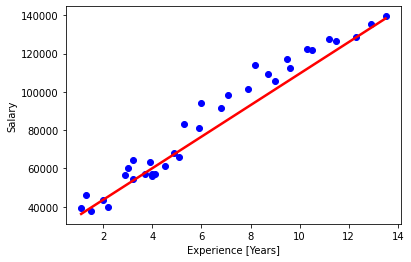

In [20]:
y_pred3 = mf.test(theta3, x, mu, std)

plt.xlabel('Experience [Years]')
plt.ylabel('Salary')
plt.plot(x[:,0], y, 'bo')
plt.plot(x[:,0], y_pred3, 'r', linewidth=2.5)

plt.show()

### Model 4 using scikit-learn

In [25]:
model4 = make_pipeline(StandardScaler(),
                       LinearRegression())
model4.fit(x, y)
y_pred4 = model4.predict(x)

### Performance Comparison

#### Model 1, Model 2 and Model 3 metrics

In [27]:
print('Cost Model 1: %.2f\nCost Model 2: %.2f\nCost Model 3: %.2f' % (J1,J2,J3))

Cost Model 1: 35006769.83
Cost Model 2: 35006790.84
Cost Model 3: 61525115.41


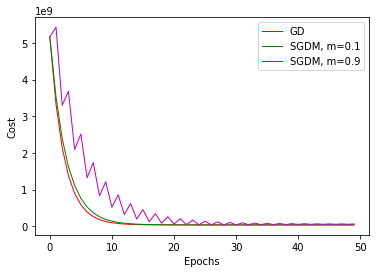

In [28]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(n_epochs1, jplot1, 'r', linewidth = 1)
plt.plot(n_epochs2, jplot2, 'g', linewidth = 1)
plt.plot(n_epochs3, jplot3, 'm', linewidth = 1)
plt.legend(('GD', 'SGDM, m=0.1', 'SGDM, m=0.9'))
plt.show()

#### Ouputs Compared

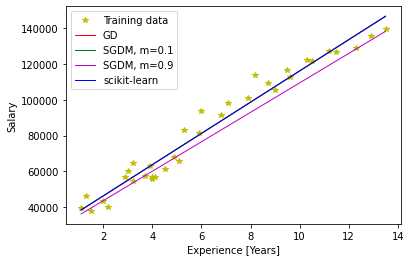

In [26]:
plt.xlabel('Experience [Years]')
plt.ylabel('Salary')
plt.plot(x[:,0], y, 'y*')
plt.plot(x[:,0], y_pred1, 'r', linewidth=1)
plt.plot(x[:,0], y_pred2, 'g', linewidth=1)
plt.plot(x[:,0], y_pred3, 'm', linewidth=1)
plt.plot(x[:,0], y_pred4, 'b', linewidth=1)
plt.legend(('Training data', 'GD', 'SGDM, m=0.1', 'SGDM, m=0.9', 'scikit-learn'))
plt.show()